In [1]:
import numpy as np
import scipy
import scipy.optimize
import matplotlib.pyplot as plt
import time
from scipy import stats
import pandas as pd
import growth_simulations as g

In [2]:
%load_ext autoreload 

In [3]:
%autoreload 2

In [23]:
td_std = [0.001, 0.001]

par1 = {'nstep': 1000, 'dt':0.01, 'td': [1.858, 3.353], 'td_std': td_std, 'v_init':1.0, 'r':0.6, 'modeltype':0, 'A_mm':0.0,
    'trans_std_mm':1.0, 'A_md':0.0, 'trans_std_md':1.0}

R2mm = 0.0470
R2md = 0.3254

par1['lambda'] = 1.0*scipy.optimize.fsolve(g.fn, x0=np.log(2.0)/np.mean(par1['td']), args=(par1['td'][0], par1['td'][1]))[0]

init_pop = g.starting_popn(par1)
c,obs = g.discr_time_1(par1, init_pop)

a = [obj.vb for obj in c if obj.exists]
print np.mean(a)

0.780283749406


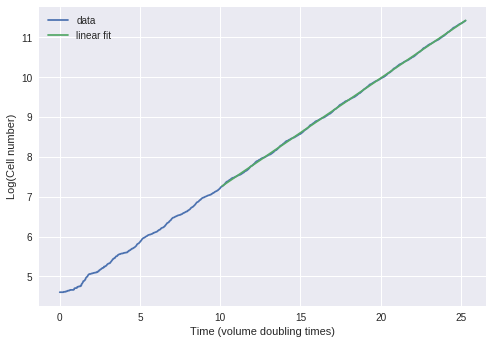

Relative growth rate =  0.9996079086
Error in growth rate =  0.000392091400471


In [24]:
plt.plot(obs[1],np.log(obs[4]), label='data')
vals=scipy.stats.linregress(obs[1][400:], np.log(obs[4][400:]))
plt.plot(obs[1][400:], obs[1][400:]*vals[0]+vals[1], label='linear fit')
plt.xlabel('Time (volume doubling times)')
plt.ylabel('Log(Cell number)')
plt.legend()
plt.show()
opt_val=scipy.optimize.fsolve(g.fn, x0=np.log(2.0)/np.mean(par1['td']), args=(par1['td'][0], par1['td'][1]))[0]
print 'Relative growth rate = ', vals[0]/opt_val
print 'Error in growth rate = ', (par1['lambda']-vals[0])/par1['lambda']

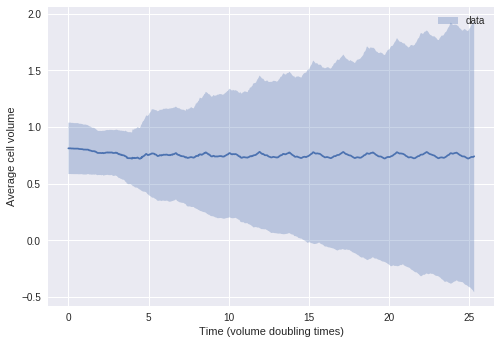

In [18]:
plt.fill_between(obs[1],obs[5]-obs[6], obs[5]+obs[6], label='data', alpha=0.3)
plt.plot(obs[1], obs[5])
# vals=scipy.stats.linregress(obs[1][400:], np.log(obs[-1][400:]))
# plt.plot(obs[1][400:], obs[1][400:]*vals[0]+vals[1], label='linear fit')
plt.xlabel('Time (volume doubling times)')
plt.ylabel('Average cell volume')
plt.legend()
plt.show()

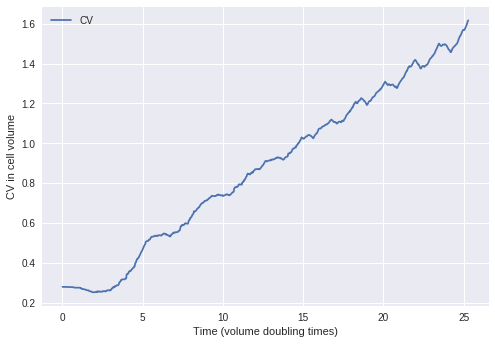

In [19]:
plt.plot(obs[1],obs[6]/obs[5],label='CV')
# plt.plot(obs[1], obs[5])
# vals=scipy.stats.linregress(obs[1][400:], np.log(obs[-1][400:]))
# plt.plot(obs[1][400:], obs[1][400:]*vals[0]+vals[1], label='linear fit')
plt.xlabel('Time (volume doubling times)')
plt.ylabel('CV in cell volume')
plt.legend()
plt.show()

Conclusion: Even when you exactly match the cell volume growth rate to that produced by the virtue of stochasticity and epigenetic division time inheritance, you still can't effectively regulate volume in this scenario.

In [9]:
vb=[]
for i0 in range(2):
    vb.append([obj.vb for obj in c if obj.exists and obj.celltype==i0])
    print np.mean(vb[-1]), np.std(vb[-1]), scipy.stats.variation(vb[-1]), i0

0.516225638677 1.18386708363 2.29331322378 0
0.767909771128 1.72972979779 2.25251697898 1


In [10]:
temp1 = [obj for obj in c if obj.exists and obj.celltype == 1]
tgrowth = [[],[]]
for obj in temp1:
    tgrowth[1].append(obj.t_grow)
    tgrowth[0].append(obj.parent_current.t_grow)
# temp = [obj]
temp2 = scipy.stats.linregress(tgrowth[0],tgrowth[1])
print 'mother daughter correlation $R^2$', temp2[2]**2

temp = [obj for obj in c if obj.exists and obj.celltype == 0]
tgrowth = [[],[]]
for obj in temp:
    tgrowth[1].append(obj.t_grow)
    tgrowth[0].append(obj.parent.t_grow)
# temp = [obj]
temp2 = scipy.stats.linregress(tgrowth[0],tgrowth[1])
print 'mother mother correlation', temp2[2]**2

mother daughter correlation $R^2$ 0.24297279529
mother mother correlation 0.00199811721655


In [11]:
print 100.0*(-len(temp)+len(temp1))/len(temp)

48.7973959033
